In [4]:
import os
import numpy as np
import pandas as pd



In [10]:
import os
import pandas as pd
from PIL import Image

def image_counter_from_path(path: str):
    data = []

    # Walk through each directory and sub-directory
    for root, dirs, files in os.walk(path):
        image_count = 0
        for file in files:
            # Check if file is an image
            try:
                with Image.open(os.path.join(root, file)) as img:
                    image_count += 1
            except (IOError, OSError):
                continue
        
        # Store folder name and image count
        if image_count > 0:
            folder_name = os.path.basename(root)
            data.append({'Folder': folder_name, 'Image Count': image_count})
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

In [27]:
PATH = '/Volumes/T7_shield/CryptoVision/Data/fish&functions_lab/cryptovision_reviewed/Species'

df_counter = image_counter_from_path(PATH)

In [28]:
df_counter.head()

,Folder,Image Count
0,Apogonidae_Apogon_binotatus,70
1,Apogonidae_Apogon_maculatus,2
2,Apogonidae_Pristiapogon_kallopterus,66
3,Apogonidae_Cheilodipterus_quinquelineatus,32
4,Gobiidae_Eviota_zebrina,20


In [29]:
import matplotlib.pyplot as plt

def plot_image_count_bar_sorted(df_counter):
    # Sort DataFrame alphabetically by Folder name
    df_sorted = df_counter.sort_values(by='Folder', ascending=True)

    # Define color mapping based on image count
    def get_bar_color(count):
        if count < 50:
            return 'red'
        elif 50 <= count <= 100:
            return 'blue'
        elif 101 <= count <= 200:
            return 'green'
        else:
            return 'purple'
    
    # Apply color function to sorted DataFrame
    colors = df_sorted['Image Count'].apply(get_bar_color)
    
    # Plot horizontal bar chart
    plt.figure(figsize=(20, 18))
    plt.barh(df_sorted['Folder'], df_sorted['Image Count'], color=colors)
    plt.xlabel('Number of Images')
    plt.ylabel('Folder')
    plt.title('Image Count by Folder (Sorted Alphabetically)')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

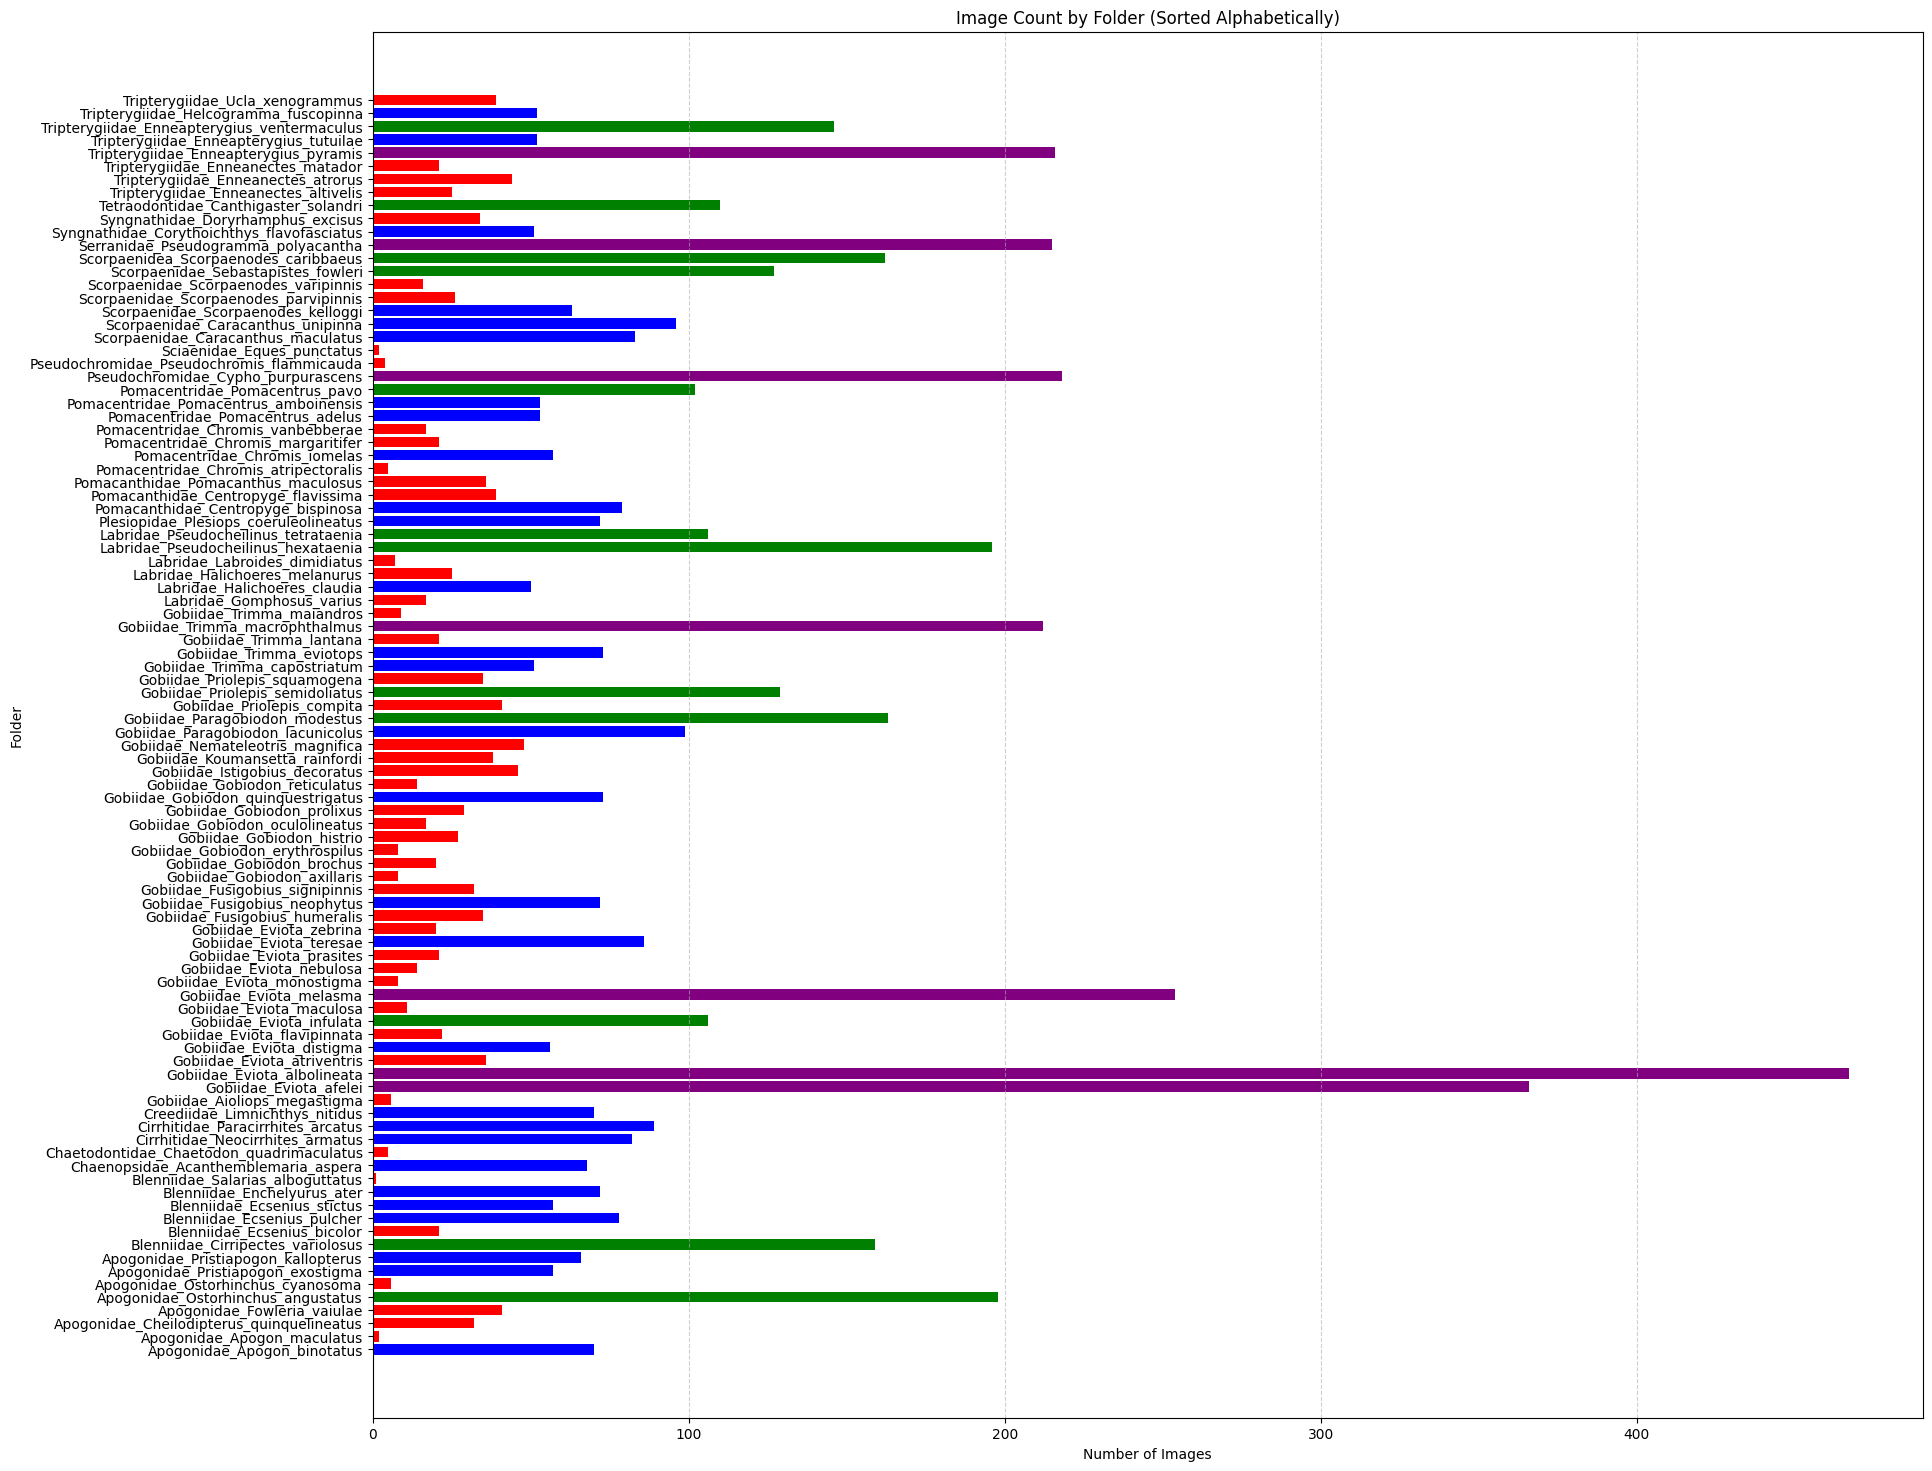

In [30]:
plot_image_count_bar_sorted(df_counter)